<a href="https://colab.research.google.com/github/AkashBhardwaj9078/Demo_git_work/blob/main/mnist00.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf

In [ ]:

from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input,Dense,Flatten,Conv2D,MaxPooling2D,Dropout,BatchNormalization
from tensorflow.keras.utils import to_categorical
import numpy as np
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
from tensorflow.keras.regularizers  import L2, L1
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import Callback, CSVLogger, EarlyStopping, LearningRateScheduler, ModelCheckpoint, ReduceLROnPlateau



In [ ]:
(xtr,ytr),(xts,yts)=mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
print("training input data shape:",xtr.shape)
print("testing input data shape:",xts.shape)
print("training output data shape:",ytr.shape)
print("testing output data shape:",yts.shape)

training input data shape: (60000, 28, 28)
testing input data shape: (10000, 28, 28)
training output data shape: (60000,)
testing output data shape: (10000,)


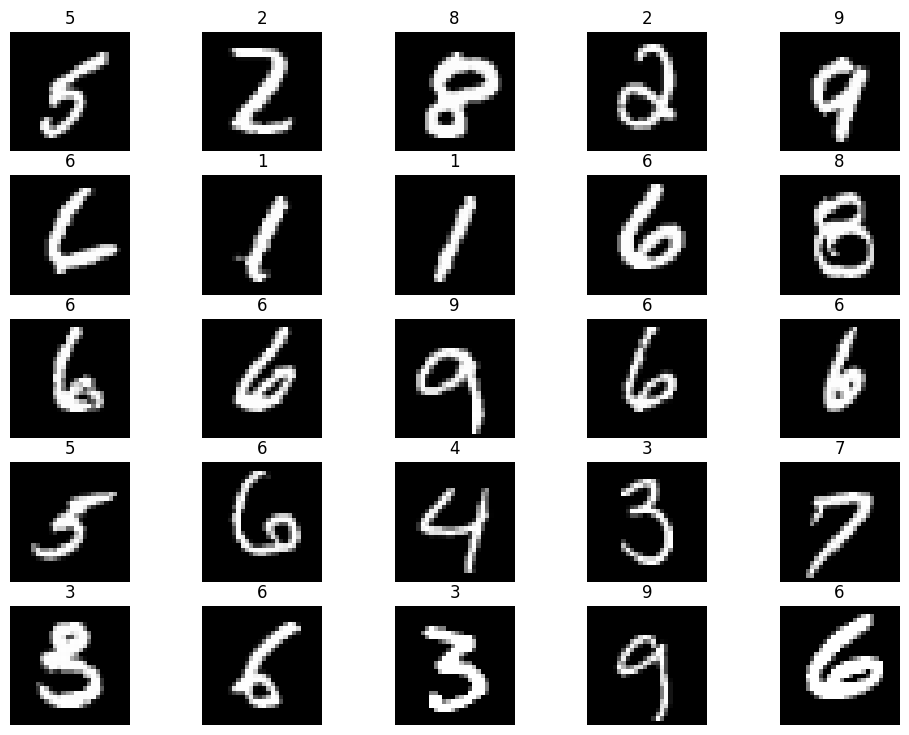

In [ ]:
plt.figure(figsize=(12,9))
for i in range(25):
  plt.subplot(5,5,i+1)
  idx=np.random.randint(0,len(xtr))
  plt.imshow(xtr[idx],cmap="gray")
  plt.title(ytr[idx])
  plt.axis("off")

In [ ]:
xtr=np.expand_dims(xtr,axis=-1)
xts=np.expand_dims(xts,axis=-1)


xtr=xtr.astype("float32")/255.0
xts=xts.astype("float32")/255.0


ytr=to_categorical(ytr)
yts=to_categorical(yts)

print(xtr.shape,ytr.shape)

(60000, 28, 28, 1) (60000, 10)


In [ ]:
train_datagen=tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=20,

    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode="nearest"

)


train_data=train_datagen.flow(
    xtr,ytr,
    batch_size=128,
    shuffle=True,
    seed=42,

)

In [ ]:
x,y=ds_train

NameError: name 'ds_train' is not defined

In [ ]:
test_datagen=tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=0.2,
    shear_range=0.2,

)

test_data=test_datagen.flow(
    xts,yts,
    batch_size=128,
    shuffle=True,
    seed=43
)

In [ ]:
num_of_classes=ytr.shape[1]
num_of_classes

10

In [ ]:
csv_callback = CSVLogger(
    'logs.csv', separator=',', append=True
)

In [ ]:
es_callback = EarlyStopping(
    monitor='val_loss', min_delta=0, patience=2, verbose=1,
    mode='auto', baseline=None, restore_best_weights=False
)

In [ ]:
import datetime

curr = datetime.datetime.now().strftime('%d%m%y - %h%m%s')
metric_dir = './logs/' + curr + '/metrics'
train_writer = tf.summary.create_file_writer(metric_dir)

In [ ]:
mod_normalised=Sequential()
mod_normalised.add(Conv2D(32,(3,3),activation="relu",input_shape=(28,28,1)))
mod_normalised.add(BatchNormalization())
mod_normalised.add(MaxPooling2D(pool_size=(2,2)))
mod_normalised.add(Dropout(0.2))

mod_normalised.add(Conv2D(64,(3,3),activation="relu"))
mod_normalised.add(BatchNormalization())
mod_normalised.add(MaxPooling2D(pool_size=(2,2)))
mod_normalised.add(Dropout(0.2))

mod_normalised.add(Conv2D(128,(3,3),activation="relu"))
mod_normalised.add(BatchNormalization())
mod_normalised.add(MaxPooling2D(pool_size=(2,2)))
mod_normalised.add(Dropout(0.2))

mod_normalised.add(Flatten())
mod_normalised.add(Dense(128,activation="relu"))
mod_normalised.add(Dropout(0.2))
mod_normalised.add(Dense(num_of_classes,activation="softmax"))

mod_normalised.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 batch_normalization (Batch  (None, 26, 26, 32)        128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 13, 13, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 batch_normalization_1 (Bat  (None, 11, 11, 64)        2

In [ ]:
def custom_loss(fact):
  def loss(y_true,y_pred):
    cce= tf.keras.losses.categorical_crossentropy()
    cce_loss=cce(y_true,y_pred)*fact
    return cce_loss

  return loss


def custom_accuracy(fact):
  def accuracy(y_true,y_pred):
    cce=tf.keras.metrics.categorical_crossentropy()
    cce_acc=cce(y_true,y_pred)*fact
    return cce_acc
  return accuracy


In [ ]:
def custom_bce(FACTOR):
  def loss(y_true, y_pred):
    bce = tf.keras.metrics.categorical_crossentropy()
    return bce(y_true, y_pred)* FACTOR
  return loss

In [ ]:
mod_normalised.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

In [ ]:
history=mod_normalised.fit(
    train_data,
    epochs=20,
    validation_data=test_data,
    callbacks=[csv_callback,es_callback]
)

Epoch 1/20
469/469 [==============================] - 101s 210ms/step - loss: 1.5725 - accuracy: 0.4364 - val_loss: 1.4287 - val_accuracy: 0.5215
Epoch 2/20
469/469 [==============================] - 102s 218ms/step - loss: 1.1076 - accuracy: 0.6131 - val_loss: 0.5161 - val_accuracy: 0.8528
Epoch 3/20
469/469 [==============================] - 97s 207ms/step - loss: 0.9438 - accuracy: 0.6767 - val_loss: 0.3976 - val_accuracy: 0.8732
Epoch 4/20
469/469 [==============================] - 95s 203ms/step - loss: 0.8602 - accuracy: 0.7075 - val_loss: 0.3720 - val_accuracy: 0.8835
Epoch 5/20
469/469 [==============================] - 102s 218ms/step - loss: 0.8002 - accuracy: 0.7288 - val_loss: 0.3559 - val_accuracy: 0.8728
Epoch 6/20
469/469 [==============================] - 99s 210ms/step - loss: 0.7658 - accuracy: 0.7417 - val_loss: 0.3621 - val_accuracy: 0.8826
Epoch 7/20
469/469 [==============================] - 97s 207ms/step - loss: 0.7300 - accuracy: 0.7541 - val_loss: 0.2916 - val

In [ ]:
history.history

{'loss': [1.5724934339523315,
  1.107618808746338,
  0.9437570571899414,
  0.8602305054664612,
  0.8002270460128784,
  0.7658103704452515,
  0.7300442457199097,
  0.7048342227935791,
  0.6931332945823669,
  0.6768763661384583,
  0.6606324315071106,
  0.6490663290023804,
  0.63970547914505],
 'accuracy': [0.4364166557788849,
  0.6131333112716675,
  0.6766833066940308,
  0.7075499892234802,
  0.7288166880607605,
  0.7417166829109192,
  0.7541166543960571,
  0.7647333145141602,
  0.7697333097457886,
  0.7768833041191101,
  0.779033362865448,
  0.7834500074386597,
  0.7845166921615601],
 'val_loss': [1.428654670715332,
  0.5161038041114807,
  0.39759209752082825,
  0.37204471230506897,
  0.35589054226875305,
  0.3620642125606537,
  0.2915635406970978,
  0.3049531877040863,
  0.2753582000732422,
  0.30696821212768555,
  0.2590160071849823,
  0.2602768540382385,
  0.27185091376304626],
 'val_accuracy': [0.5214999914169312,
  0.8528000116348267,
  0.873199999332428,
  0.8834999799728394,
  0.

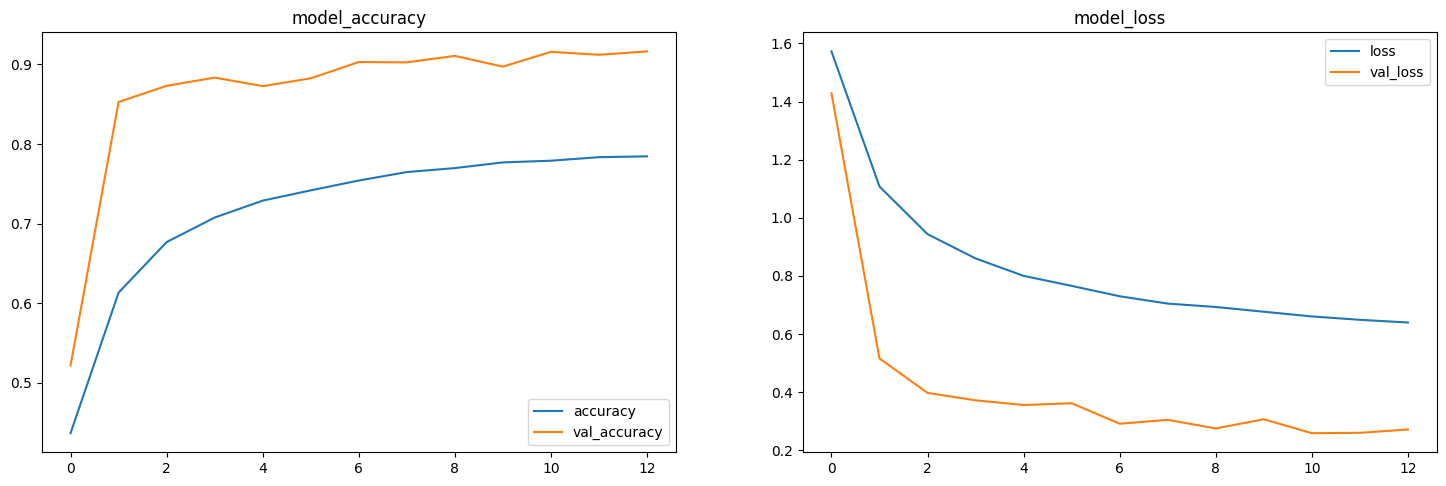

In [ ]:
hist=history
plt.figure(figsize=(18,12))
plt.subplot(2,2,1)
plt.title("model_accuracy")
plt.plot(hist.history['accuracy'],label="accuracy")
plt.plot(hist.history['val_accuracy'],label="val_accuracy")
plt.legend()

plt.subplot(2,2,2)
plt.title("model_loss")
plt.plot(hist.history['loss'],label="loss")
plt.plot(hist.history['val_loss'],label="val_loss")
plt.legend()

In [ ]:
%load_ext tensorboard

In [ ]:
score=mod_normalised.evaluate(xts,yts,verbose=1)
print("test_loss:",score[0])
print("test_accuracy:",score[1])

313/313 [==============================] - 3s 11ms/step - loss: 0.2738 - accuracy: 0.9156
test_loss: 0.2737761437892914
test_accuracy: 0.9156000018119812


In [ ]:
prediction=mod_normalised.predict(xts)
pred=np.argmax(prediction,axis=-1)


313/313 [==============================] - 5s 15ms/step


In [ ]:
from sklearn.metrics import confusion_matrix,classification_report

In [ ]:
pred

array([7, 2, 1, ..., 4, 5, 6])

In [ ]:
y_true=[np.argmax(i) for i in yts]
y_true

[7,
 2,
 1,
 0,
 4,
 1,
 4,
 9,
 5,
 9,
 0,
 6,
 9,
 0,
 1,
 5,
 9,
 7,
 3,
 4,
 9,
 6,
 6,
 5,
 4,
 0,
 7,
 4,
 0,
 1,
 3,
 1,
 3,
 4,
 7,
 2,
 7,
 1,
 2,
 1,
 1,
 7,
 4,
 2,
 3,
 5,
 1,
 2,
 4,
 4,
 6,
 3,
 5,
 5,
 6,
 0,
 4,
 1,
 9,
 5,
 7,
 8,
 9,
 3,
 7,
 4,
 6,
 4,
 3,
 0,
 7,
 0,
 2,
 9,
 1,
 7,
 3,
 2,
 9,
 7,
 7,
 6,
 2,
 7,
 8,
 4,
 7,
 3,
 6,
 1,
 3,
 6,
 9,
 3,
 1,
 4,
 1,
 7,
 6,
 9,
 6,
 0,
 5,
 4,
 9,
 9,
 2,
 1,
 9,
 4,
 8,
 7,
 3,
 9,
 7,
 4,
 4,
 4,
 9,
 2,
 5,
 4,
 7,
 6,
 7,
 9,
 0,
 5,
 8,
 5,
 6,
 6,
 5,
 7,
 8,
 1,
 0,
 1,
 6,
 4,
 6,
 7,
 3,
 1,
 7,
 1,
 8,
 2,
 0,
 2,
 9,
 9,
 5,
 5,
 1,
 5,
 6,
 0,
 3,
 4,
 4,
 6,
 5,
 4,
 6,
 5,
 4,
 5,
 1,
 4,
 4,
 7,
 2,
 3,
 2,
 7,
 1,
 8,
 1,
 8,
 1,
 8,
 5,
 0,
 8,
 9,
 2,
 5,
 0,
 1,
 1,
 1,
 0,
 9,
 0,
 3,
 1,
 6,
 4,
 2,
 3,
 6,
 1,
 1,
 1,
 3,
 9,
 5,
 2,
 9,
 4,
 5,
 9,
 3,
 9,
 0,
 3,
 6,
 5,
 5,
 7,
 2,
 2,
 7,
 1,
 2,
 8,
 4,
 1,
 7,
 3,
 3,
 8,
 8,
 7,
 9,
 2,
 2,
 4,
 1,
 5,
 9,
 8,
 7,
 2,
 3,
 0,
 4,
 4,
 2,


In [ ]:
print(confusion_matrix(y_true,pred))

print(classification_report(y_true,pred))


[[ 972    0    3    0    0    0    1    3    0    1]
 [   6 1048    6    1    5    0    2   66    0    1]
 [   4    0  951   15    2   24    8   18    8    2]
 [   0    0   26  964    0   12    0    6    2    0]
 [   5    0    1    0  971    0    0    2    1    2]
 [  22    0   93   11    1  738    2   18    1    6]
 [  29    0    8    0    3    1  816   44    1   56]
 [  10    3   61   14   12    2    6  920    0    0]
 [   5    0    3    3    6    0    1    0  954    2]
 [  50    0    8    0   12   20   80    3   14  822]]
              precision    recall  f1-score   support

           0       0.88      0.99      0.93       980
           1       1.00      0.92      0.96      1135
           2       0.82      0.92      0.87      1032
           3       0.96      0.95      0.96      1010
           4       0.96      0.99      0.97       982
           5       0.93      0.83      0.87       892
           6       0.89      0.85      0.87       958
           7       0.85      0.89   

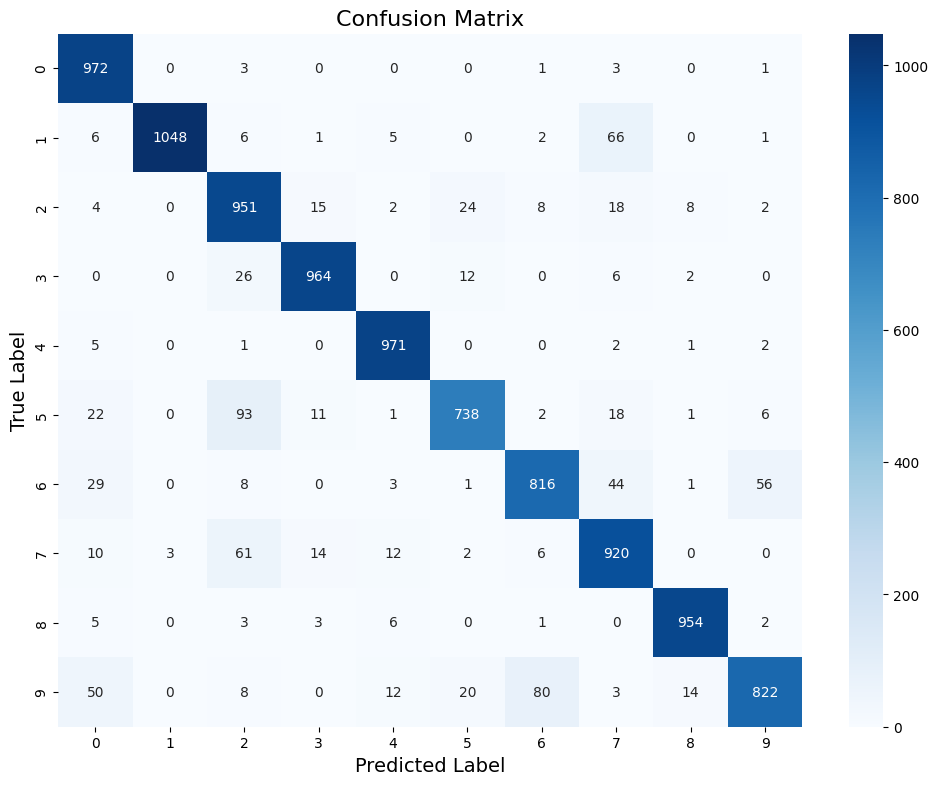

In [ ]:


import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true, pred)

cm_df = pd.DataFrame(cm, columns=np.unique(y_true), index=np.unique(y_true))

plt.figure(figsize=(12, 9))
sns.heatmap(cm_df, annot=True, fmt=".0f", cmap="Blues")
plt.title("Confusion Matrix", fontsize=16)
plt.xlabel("Predicted Label", fontsize=14)
plt.ylabel("True Label", fontsize=14)
plt.show()


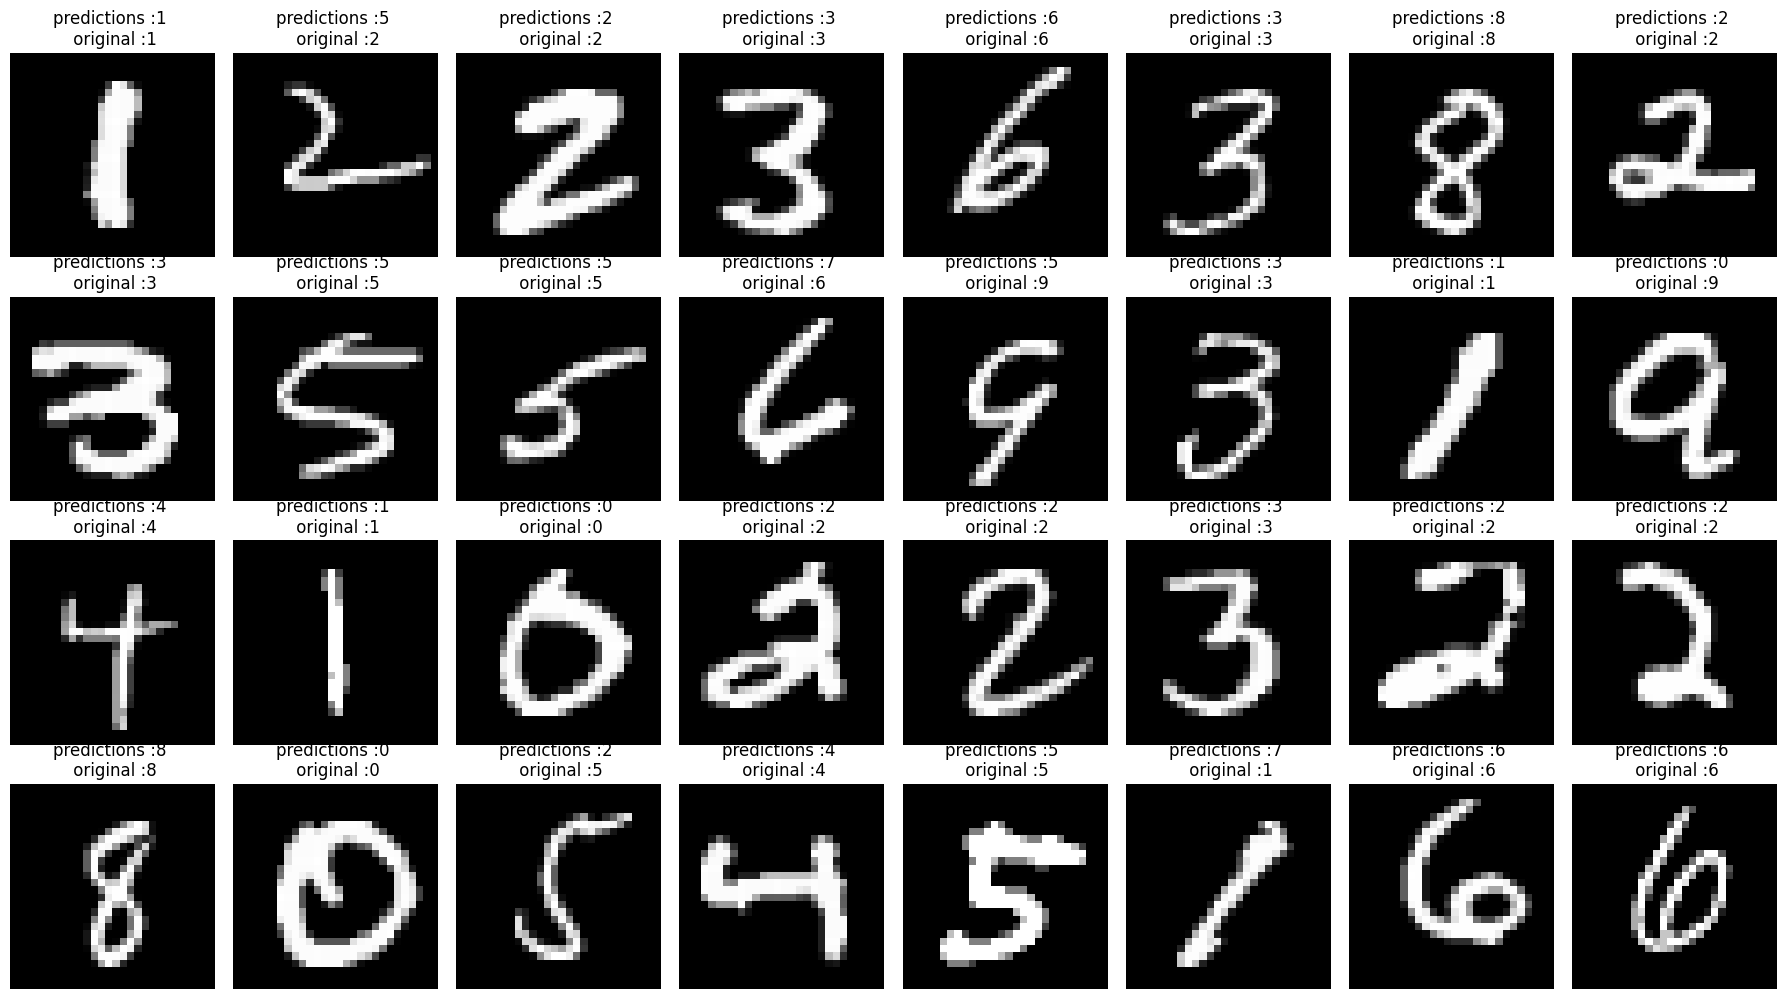

In [ ]:
fig,axes=plt.subplots(4,8,figsize=(18,10))
axes=axes.ravel()
for i in range(32):
  idx=np.random.randint(0,len(xts))

  axes[i].imshow(xts[idx],cmap="gray")
  axes[i].set_title(f"predictions :{pred[idx]} \n original :{(y_true[idx])}")
  axes[i].axis("off")

plt.tight_layout()
plt.show()

In [ ]:
convlayers=[layer for layer in mod_normalised.layers if "conv" in layer.name]

(3, 3, 1, 32) (32,)


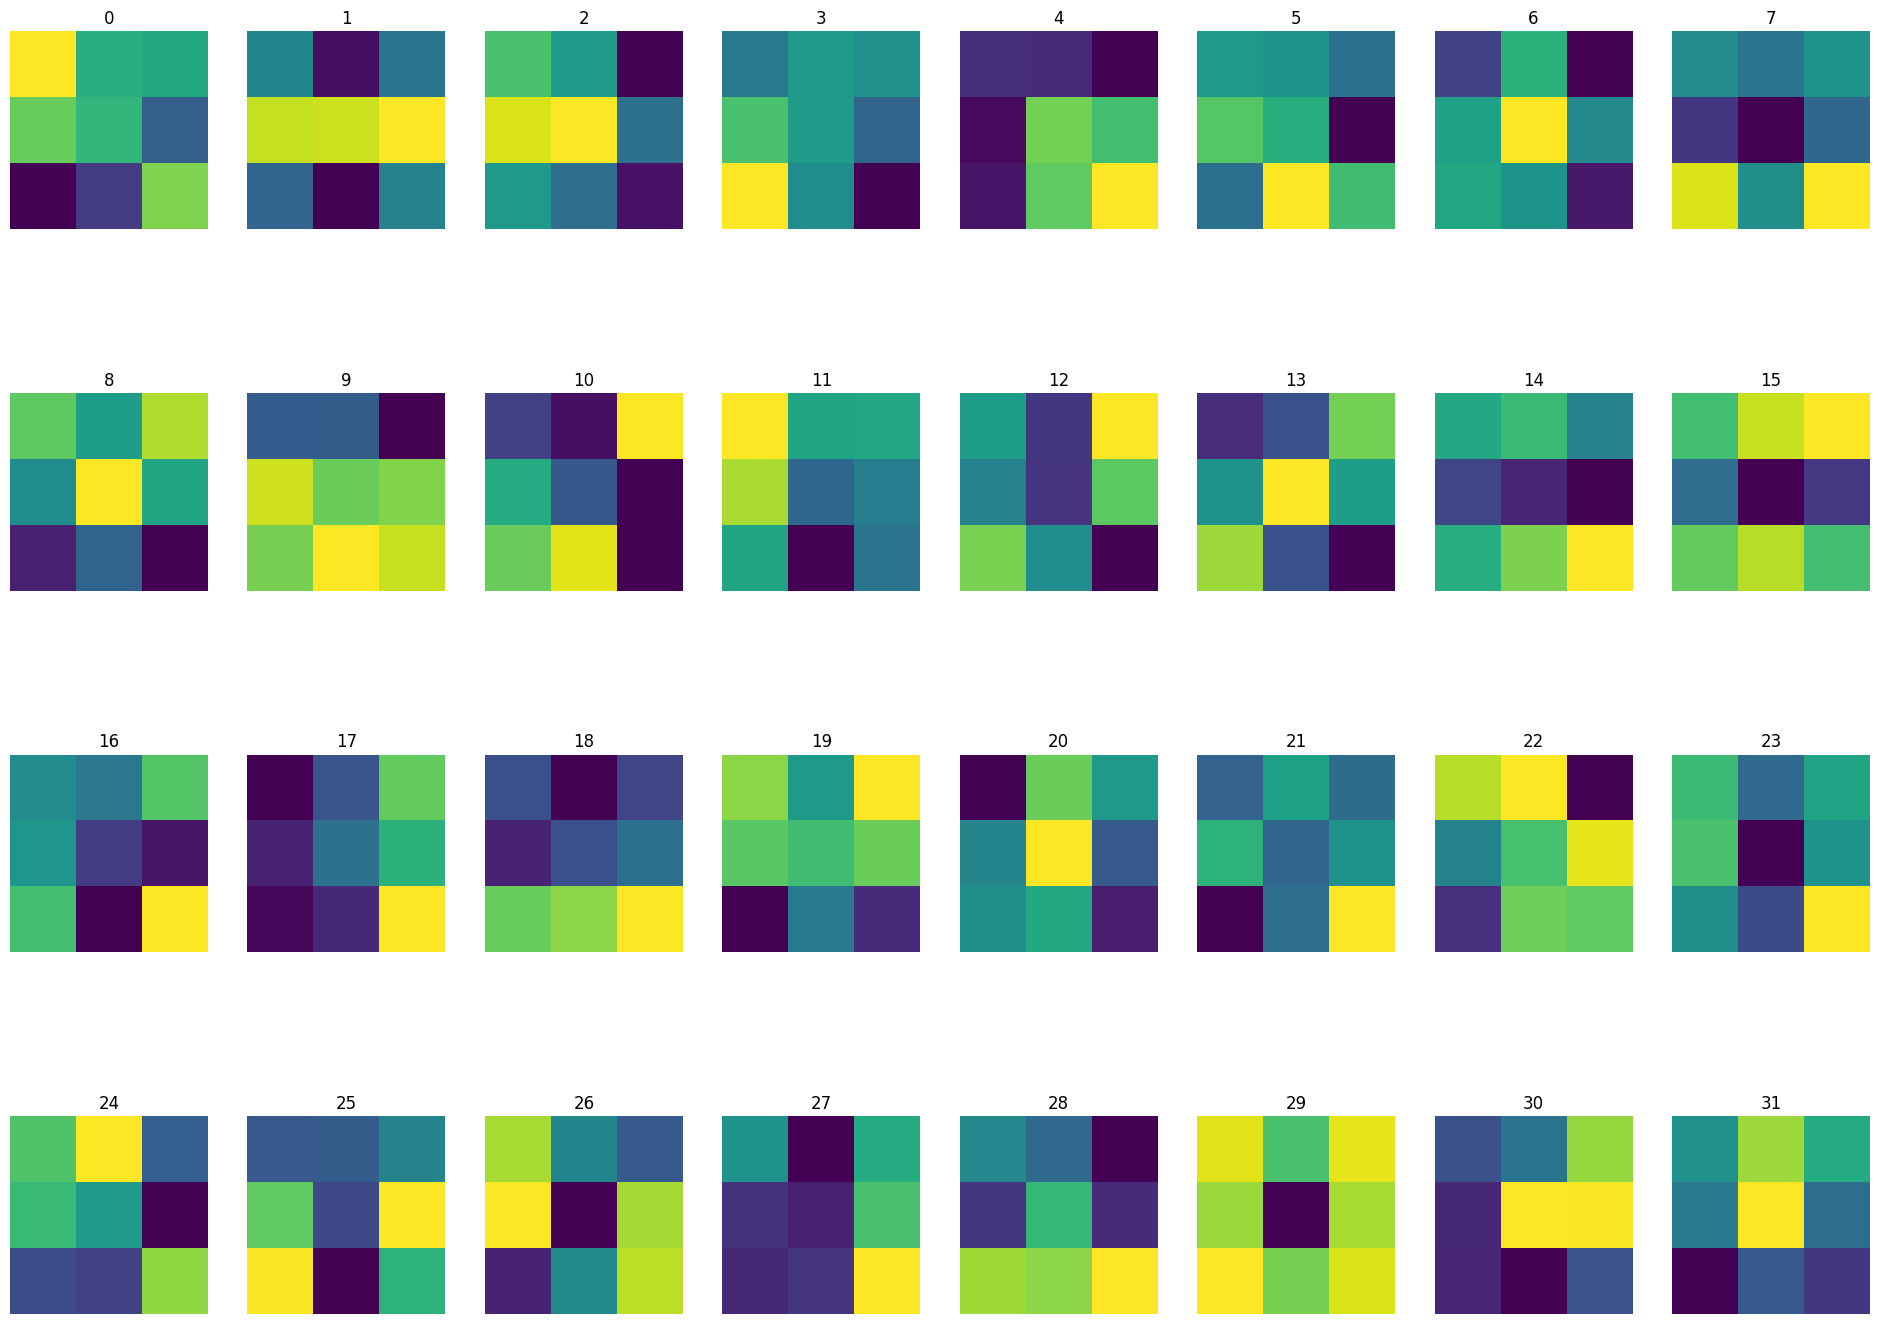

In [ ]:

fill,basis=convlayers[0].get_weights()
print(fill.shape,basis.shape)
plt.figure(figsize=(24,18))

for i in range(32):
  plt.subplot(4,8,i+1)
  plt.imshow(fill[:,:,:,i])
  plt.axis("off")
  plt.title(i)




In [ ]:
class conv_block:
    def __init__(self, filters, kernel_size, padding="same", activation="relu"):
        super(conv_block, self).__init__()
        self.conv_1 = Conv2D(filters, kernel_size, padding=padding, activation=activation)
        self.conv_2 = Conv2D(2*filters+4, kernel_size, padding=padding, activation=activation)
        self.pool = MaxPooling2D(pool_size=(2, 2))
        self.drop = Dropout(0.2)
        self.bn1 = BatchNormalization()
        self.bn2 = BatchNormalization()

    def call(self, x):
        x = self.conv_1(x)
        x = self.bn1(x)
        x = self.drop(x)
        x = self.conv_2(x)
        x = self.bn2(x)
        x = self.drop(x)
        x = self.pool(x) # Added the pooling layer to the call method
        return x

In [ ]:
layer=conv_block(6,3)
input_tensor = tf.keras.Input(shape=(28,28,1)) # Define input with correct shape
x=layer.call(input_tensor)  # Pass the input tensor to the layer
x=Flatten()(x)
x=Dense(128,activation="relu")(x)
x=Dense(64,activation="relu")(x)
x=Dense(10,activation="softmax")(x)

mod=tf.keras.Model(inputs=input_tensor,outputs=x) # Use the same input tensor
mod.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 28, 28, 1)]          0         []                            
                                                                                                  
 conv2d_3 (Conv2D)           (None, 28, 28, 6)            60        ['input_1[0][0]']             
                                                                                                  
 batch_normalization_3 (Bat  (None, 28, 28, 6)            24        ['conv2d_3[0][0]']            
 chNormalization)                                                                                 
                                                                                                  
 dropout_4 (Dropout)         (None, 28, 28, 6)            0         ['batch_normalization_3[0]

In [ ]:
history=mod.fit(
    train_data,
    epochs=20,
    validation_data=test_data,
    callbacks=[csv_callback,es_callback]
)

Epoch 1/20
469/469 [==============================] - 98s 205ms/step - loss: 1.4023 - accuracy: 0.4987 - val_loss: 3.5056 - val_accuracy: 0.2244
Epoch 2/20
469/469 [==============================] - 90s 192ms/step - loss: 0.8933 - accuracy: 0.6879 - val_loss: 1.1098 - val_accuracy: 0.6316
Epoch 3/20
469/469 [==============================] - 92s 196ms/step - loss: 0.7308 - accuracy: 0.7512 - val_loss: 0.5631 - val_accuracy: 0.8096
Epoch 4/20
469/469 [==============================] - 90s 191ms/step - loss: 0.6347 - accuracy: 0.7866 - val_loss: 0.7627 - val_accuracy: 0.7543
Epoch 5/20
469/469 [==============================] - 91s 195ms/step - loss: 0.5673 - accuracy: 0.8118 - val_loss: 0.6502 - val_accuracy: 0.7877
Epoch 5: early stopping


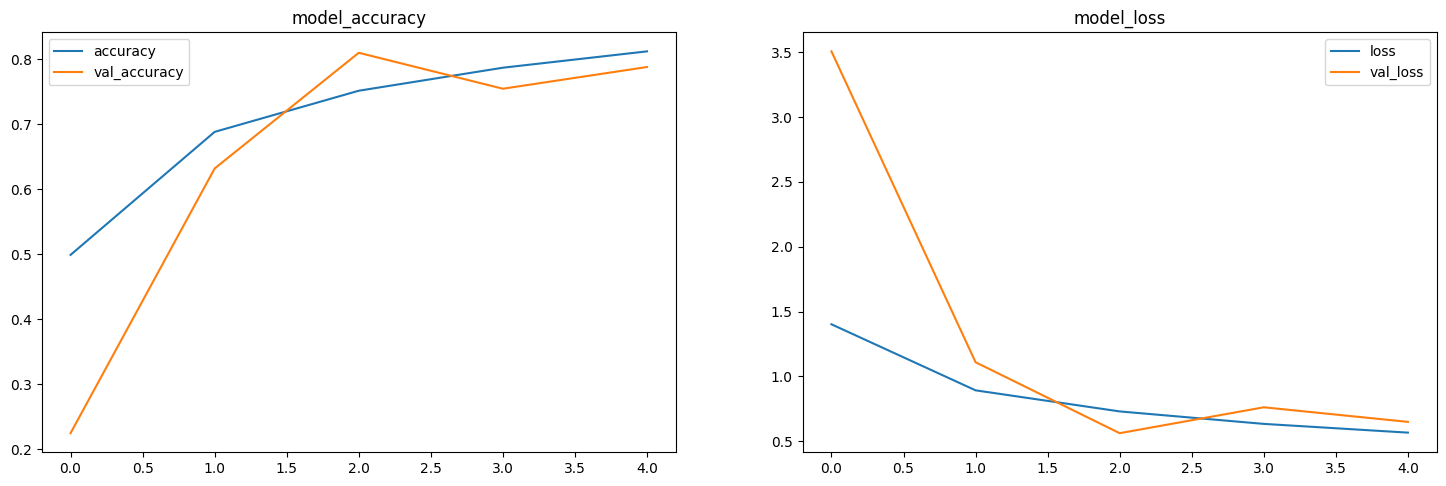

In [ ]:
hist=history


plt.figure(figsize=(18,12))
plt.subplot(2,2,1)
plt.title("model_accuracy")
plt.plot(hist.history['accuracy'],label="accuracy")
plt.plot(hist.history['val_accuracy'],label="val_accuracy")
plt.legend()




plt.subplot(2,2,2)
plt.title("model_loss")
plt.plot(hist.history['loss'],label="loss")
plt.plot(hist.history['val_loss'],label="val_loss")
plt.legend()

In [ ]:
score=mod.evaluate(xts,yts,verbose=1)
print("test_loss:",score[0])
print("test_accuracy:",score[1])

313/313 [==============================] - 9s 28ms/step - loss: 0.6389 - accuracy: 0.7906
test_loss: 0.6389068365097046
test_accuracy: 0.7906000018119812


In [ ]:
prediction=mod.predict(xts)
pred=np.argmax(prediction,axis=-1)

313/313 [==============================] - 6s 19ms/step


In [ ]:
print(confusion_matrix(y_true,pred))

print(classification_report(y_true,pred))


[[ 957    3    2    0    0    1    2   12    0    3]
 [   0 1125    5    0    0    0    0    5    0    0]
 [   4   13  750    8    3  167   13   69    2    3]
 [   0    3   33  796    0  162    1   14    0    1]
 [   0   35    0    0  870    0    0   68    0    9]
 [   2    5   19    9    0  833    0   22    0    2]
 [  37   11    2    2    3   11  565  216    0  111]
 [   2   28    4    0    3    5    2  983    0    1]
 [  27   26   58  198    6   74   17   55  315  198]
 [  23   18    2    2   15   24   38  175    0  712]]
              precision    recall  f1-score   support

           0       0.91      0.98      0.94       980
           1       0.89      0.99      0.94      1135
           2       0.86      0.73      0.79      1032
           3       0.78      0.79      0.79      1010
           4       0.97      0.89      0.92       982
           5       0.65      0.93      0.77       892
           6       0.89      0.59      0.71       958
           7       0.61      0.96   

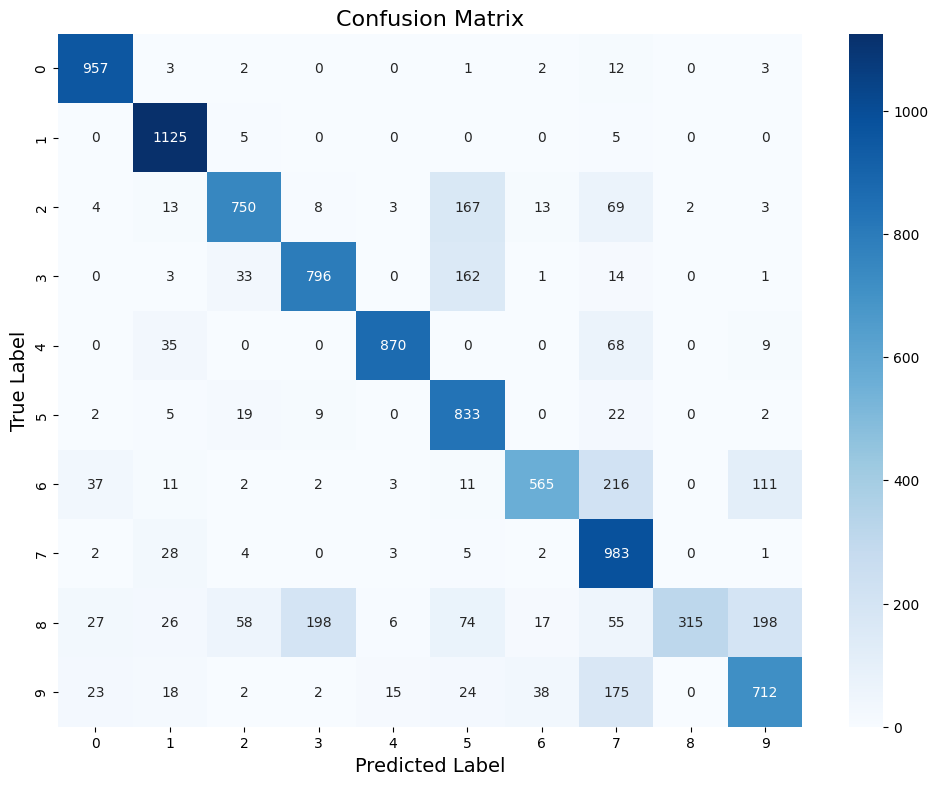

In [ ]:


import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true, pred)

cm_df = pd.DataFrame(cm, columns=np.unique(y_true), index=np.unique(y_true))

plt.figure(figsize=(12, 9))
sns.heatmap(cm_df, annot=True, fmt=".0f", cmap="Blues")
plt.title("Confusion Matrix", fontsize=16)
plt.xlabel("Predicted Label", fontsize=14)
plt.ylabel("True Label", fontsize=14)
plt.show()


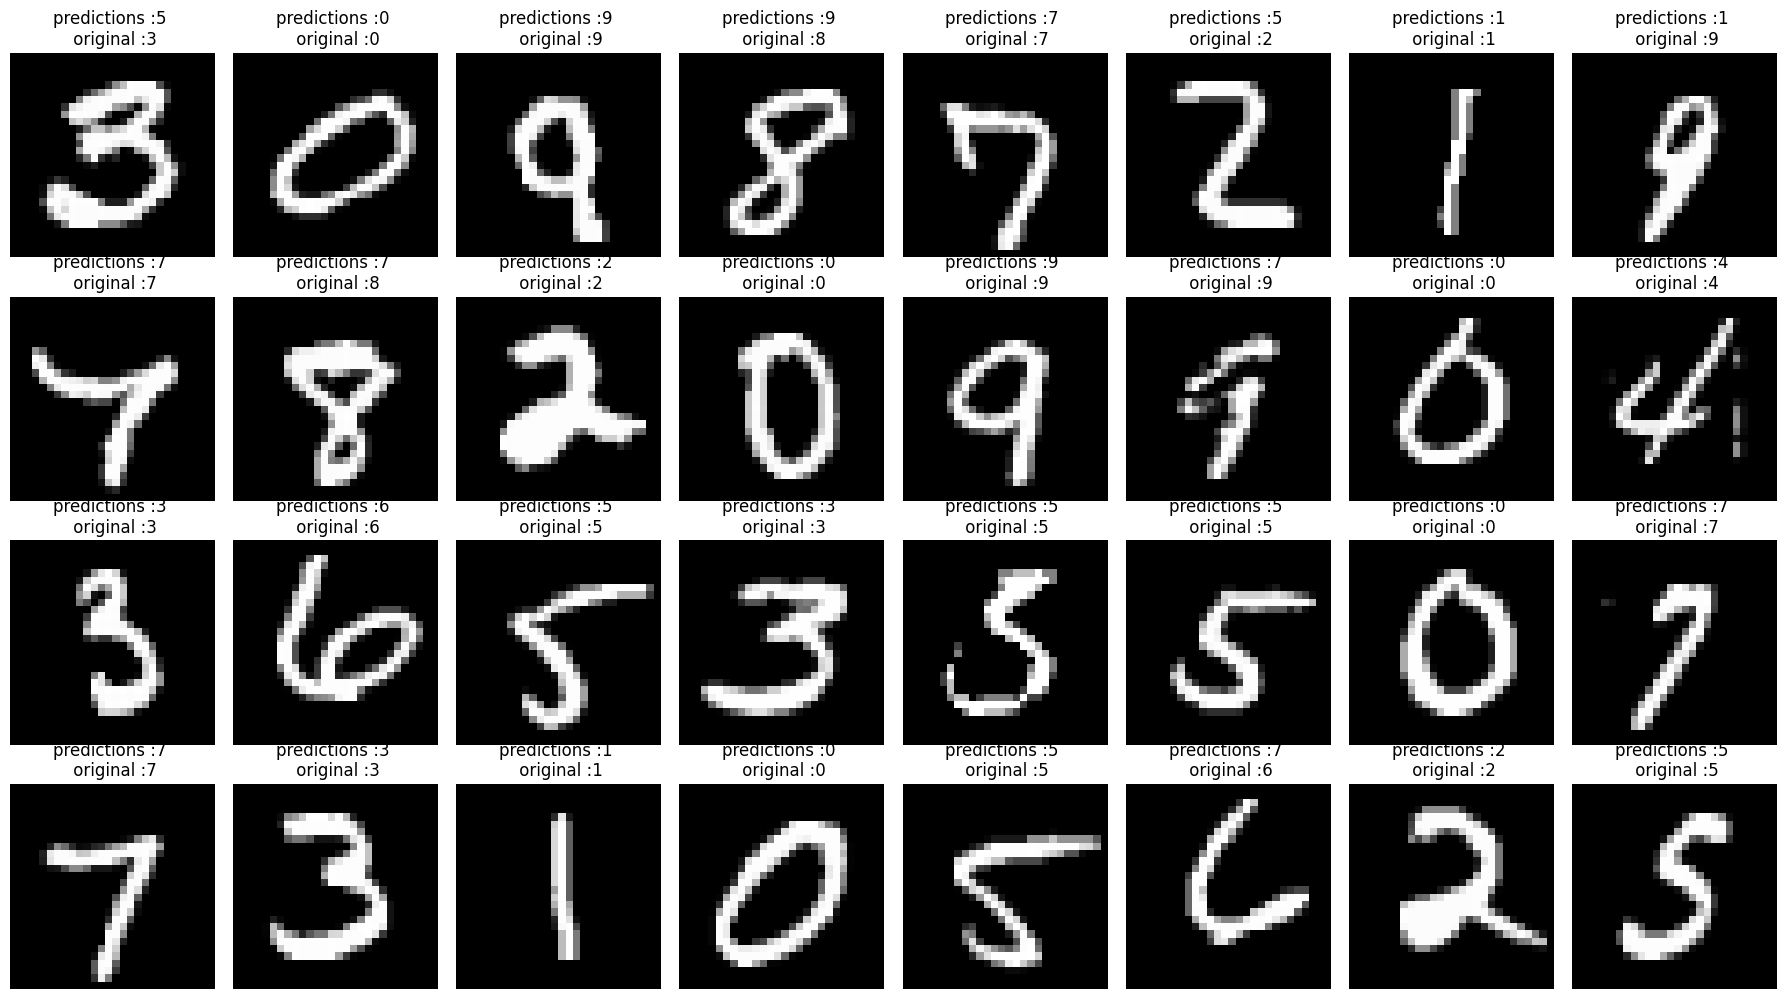

In [ ]:
fig,axes=plt.subplots(4,8,figsize=(18,10))
axes=axes.ravel()
for i in range(32):
  idx=np.random.randint(0,len(xts))

  axes[i].imshow(xts[idx],cmap="gray")
  axes[i].set_title(f"predictions :{pred[idx]} \n original :{(y_true[idx])}")
  axes[i].axis("off")

plt.tight_layout()
plt.show()

In [ ]:
def bce():
  def loss(y_true,y_pred):
    bce= tf.keras.losses.binary_crossentropy(y_pred,y_pred,from_logits=False)

    return bce*0.3

  return loss


In [ ]:

class CustomAccuracy(tf.keras.metrics.Metric):
  def __init__(self, name = 'Custom_Accuracy', FACTOR = 1):
    super(CustomAccuracy, self).__init__()
    self.FACTOR = FACTOR
    self.accuracy = self.add_weight(name = name, initializer = 'zeros')


  def update_state(self, y_true, y_pred, sample_weight = None):
    output =  tf.keras.metrics.CategoricalCrossentropy(tf.cast(y_true, dtype = tf.float32), y_pred)*self.FACTOR
    self.accuracy.assign(tf.math.count_nonzero(output, dtype = tf.float32)/tf.cast(len(output), dtype = tf.float32))

  def result(self):
    return self.accuracy

  def reset_states(self):
    self.accuracy.assign(0.)

In [ ]:
class custom_acc(tf.keras.metrics.Metric):
  def __init__(self,fact):
    super(custom_acc,self).__init__()
    self.fact=fact
    self.accuracy=self.add_weight(name="name",initializer="zeros")

  def __call__(self):
    def loss(y_true,y_pred,sample_weights=None):
      output=tf.keras.metrics.categorical_crossentropy(tf.cast(y_true,tf.float32),y_pred,from_logits=False)
      =\
      return cce*self.fact
    return loss

  def update_state(self):
    self.accuracy.assign_add(tf.keras.metrics.categorical_crossentropy(y_true, y_pred, from_logits=False)*self.fact)

  def result(self):
    return self.accuracy

  def reset_state(self):
    self.accuracy.assign(0.)




In [ ]:
custom_acc(0.3)

In [ ]:
mod.compile(
    optimizer="adam",
    loss=bce(),
    metrics=CustomAccuracy(0.3)
)

mod.fit(
    train_data,
    epochs=20,
    validation_data=test_data
)



TypeError: unsupported operand type(s) for +: 'float' and 'str'

In [ ]:
custom_acc(0.3)

AttributeError: 'custom_acc' object has no attribute '_dtype_policy'

In [ ]:
import tensorflow as tf

def custom_bce(fact):
  def loss(y_true, y_pred):
    bce = tf.keras.losses.binary_crossentropy(y_true, y_pred, from_logits=False)
    return bce*fact
  return loss

def custom_accuracy(fact):
  def loss(y_true,y_pred):
    cce=tf.keras.metrics.categorical_crossentropy(y_true,y_pred,from_logits=False)

    return cce*fact
  return loss

mod.compile(
    optimizer="adam",
    loss=Cus  # Use the custom loss function
    metrics=custom_acc(0.2)
)

mod.fit(
    train_data,
    epochs=20,
    validation_data=test_data,

)